In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.metrics import classification_report,roc_curve, auc
%matplotlib inline


In [5]:
#load zip file view records, check df info
# to run this code you must download the dataset and store it in a data/ directory in this project
# data can be downloaded here:
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data


#begin data munging process
df = pd.read_csv('data/creditcard.csv.zip')
df.info()
# look for any problems with data structure


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# drop time just shows sequence of transactions
df = df.drop(['Time'], axis=1)

# feature engineering addressing Amount
df['Rounded'] = df.Amount.apply(lambda x: int(round(x)))
print(df['Amount'].head())
print(df['Rounded'].head())
# note might be better to round to nearest ten


0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64
0    150
1      3
2    379
3    124
4     70
Name: Rounded, dtype: int64


In [7]:
# Check class for blanks to delete
print(df['Class'].unique())

#no blanks found

[0 1]


In [8]:
df.info()

df = df.drop(['Amount'], axis=1)
df_features = df.drop(['Class',"Rounded"], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   V1       284807 non-null  float64
 1   V2       284807 non-null  float64
 2   V3       284807 non-null  float64
 3   V4       284807 non-null  float64
 4   V5       284807 non-null  float64
 5   V6       284807 non-null  float64
 6   V7       284807 non-null  float64
 7   V8       284807 non-null  float64
 8   V9       284807 non-null  float64
 9   V10      284807 non-null  float64
 10  V11      284807 non-null  float64
 11  V12      284807 non-null  float64
 12  V13      284807 non-null  float64
 13  V14      284807 non-null  float64
 14  V15      284807 non-null  float64
 15  V16      284807 non-null  float64
 16  V17      284807 non-null  float64
 17  V18      284807 non-null  float64
 18  V19      284807 non-null  float64
 19  V20      284807 non-null  float64
 20  V21      284807 non-null  

In [9]:
# check features for multilinearity


<Axes: >

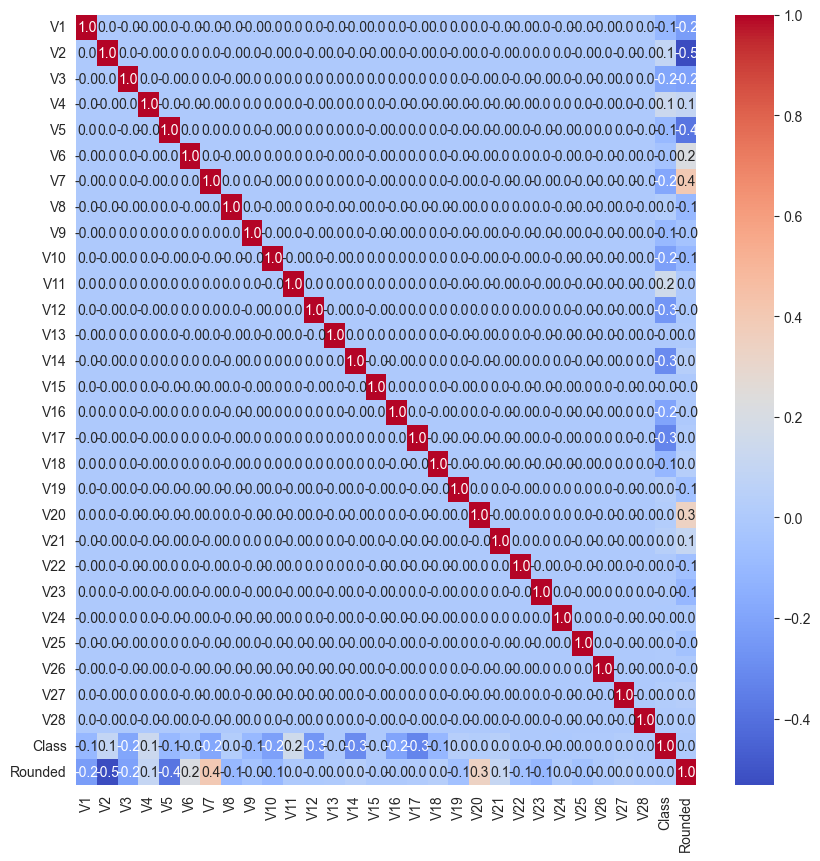

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".1f",cmap="coolwarm")

In [11]:
print("Predicted Top Features based on correlations data: V3, V7, V12, V14, V16")
corr_matrix = df_features.corr()

corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)

corr_pairs.columns = ["Feature1", "Feature2", "Correlation"]

# Sort by absolute correlation value (highest first)
corr_pairs = corr_pairs.reindex(corr_pairs["Correlation"].abs().sort_values(ascending=False).index)

# Display top correlations
print(corr_pairs.head(20))


Predicted Top Features based on correlations data: V3, V7, V12, V14, V16
    Feature1 Feature2   Correlation
242      V12      V13 -2.317642e-14
312      V17      V18 -4.899669e-15
192       V9      V14  3.780984e-15
350      V21      V22  3.666786e-15
372      V25      V26  2.617351e-15
323      V18      V19 -2.499056e-15
300      V16      V17  2.484765e-15
301      V16      V18 -2.412445e-15
286      V14      V28  2.291124e-15
191       V9      V13  2.244447e-15
112       V5      V16  2.218522e-15
258      V13      V14  2.128014e-15
26        V1      V28  2.108702e-15
129       V6      V11  1.975490e-15
237      V11      V24  1.943105e-15
208      V10      V12  1.763067e-15
166       V7      V27 -1.723845e-15
78        V4       V5 -1.722056e-15
276      V14      V18  1.630044e-15
55        V3       V6  1.627805e-15


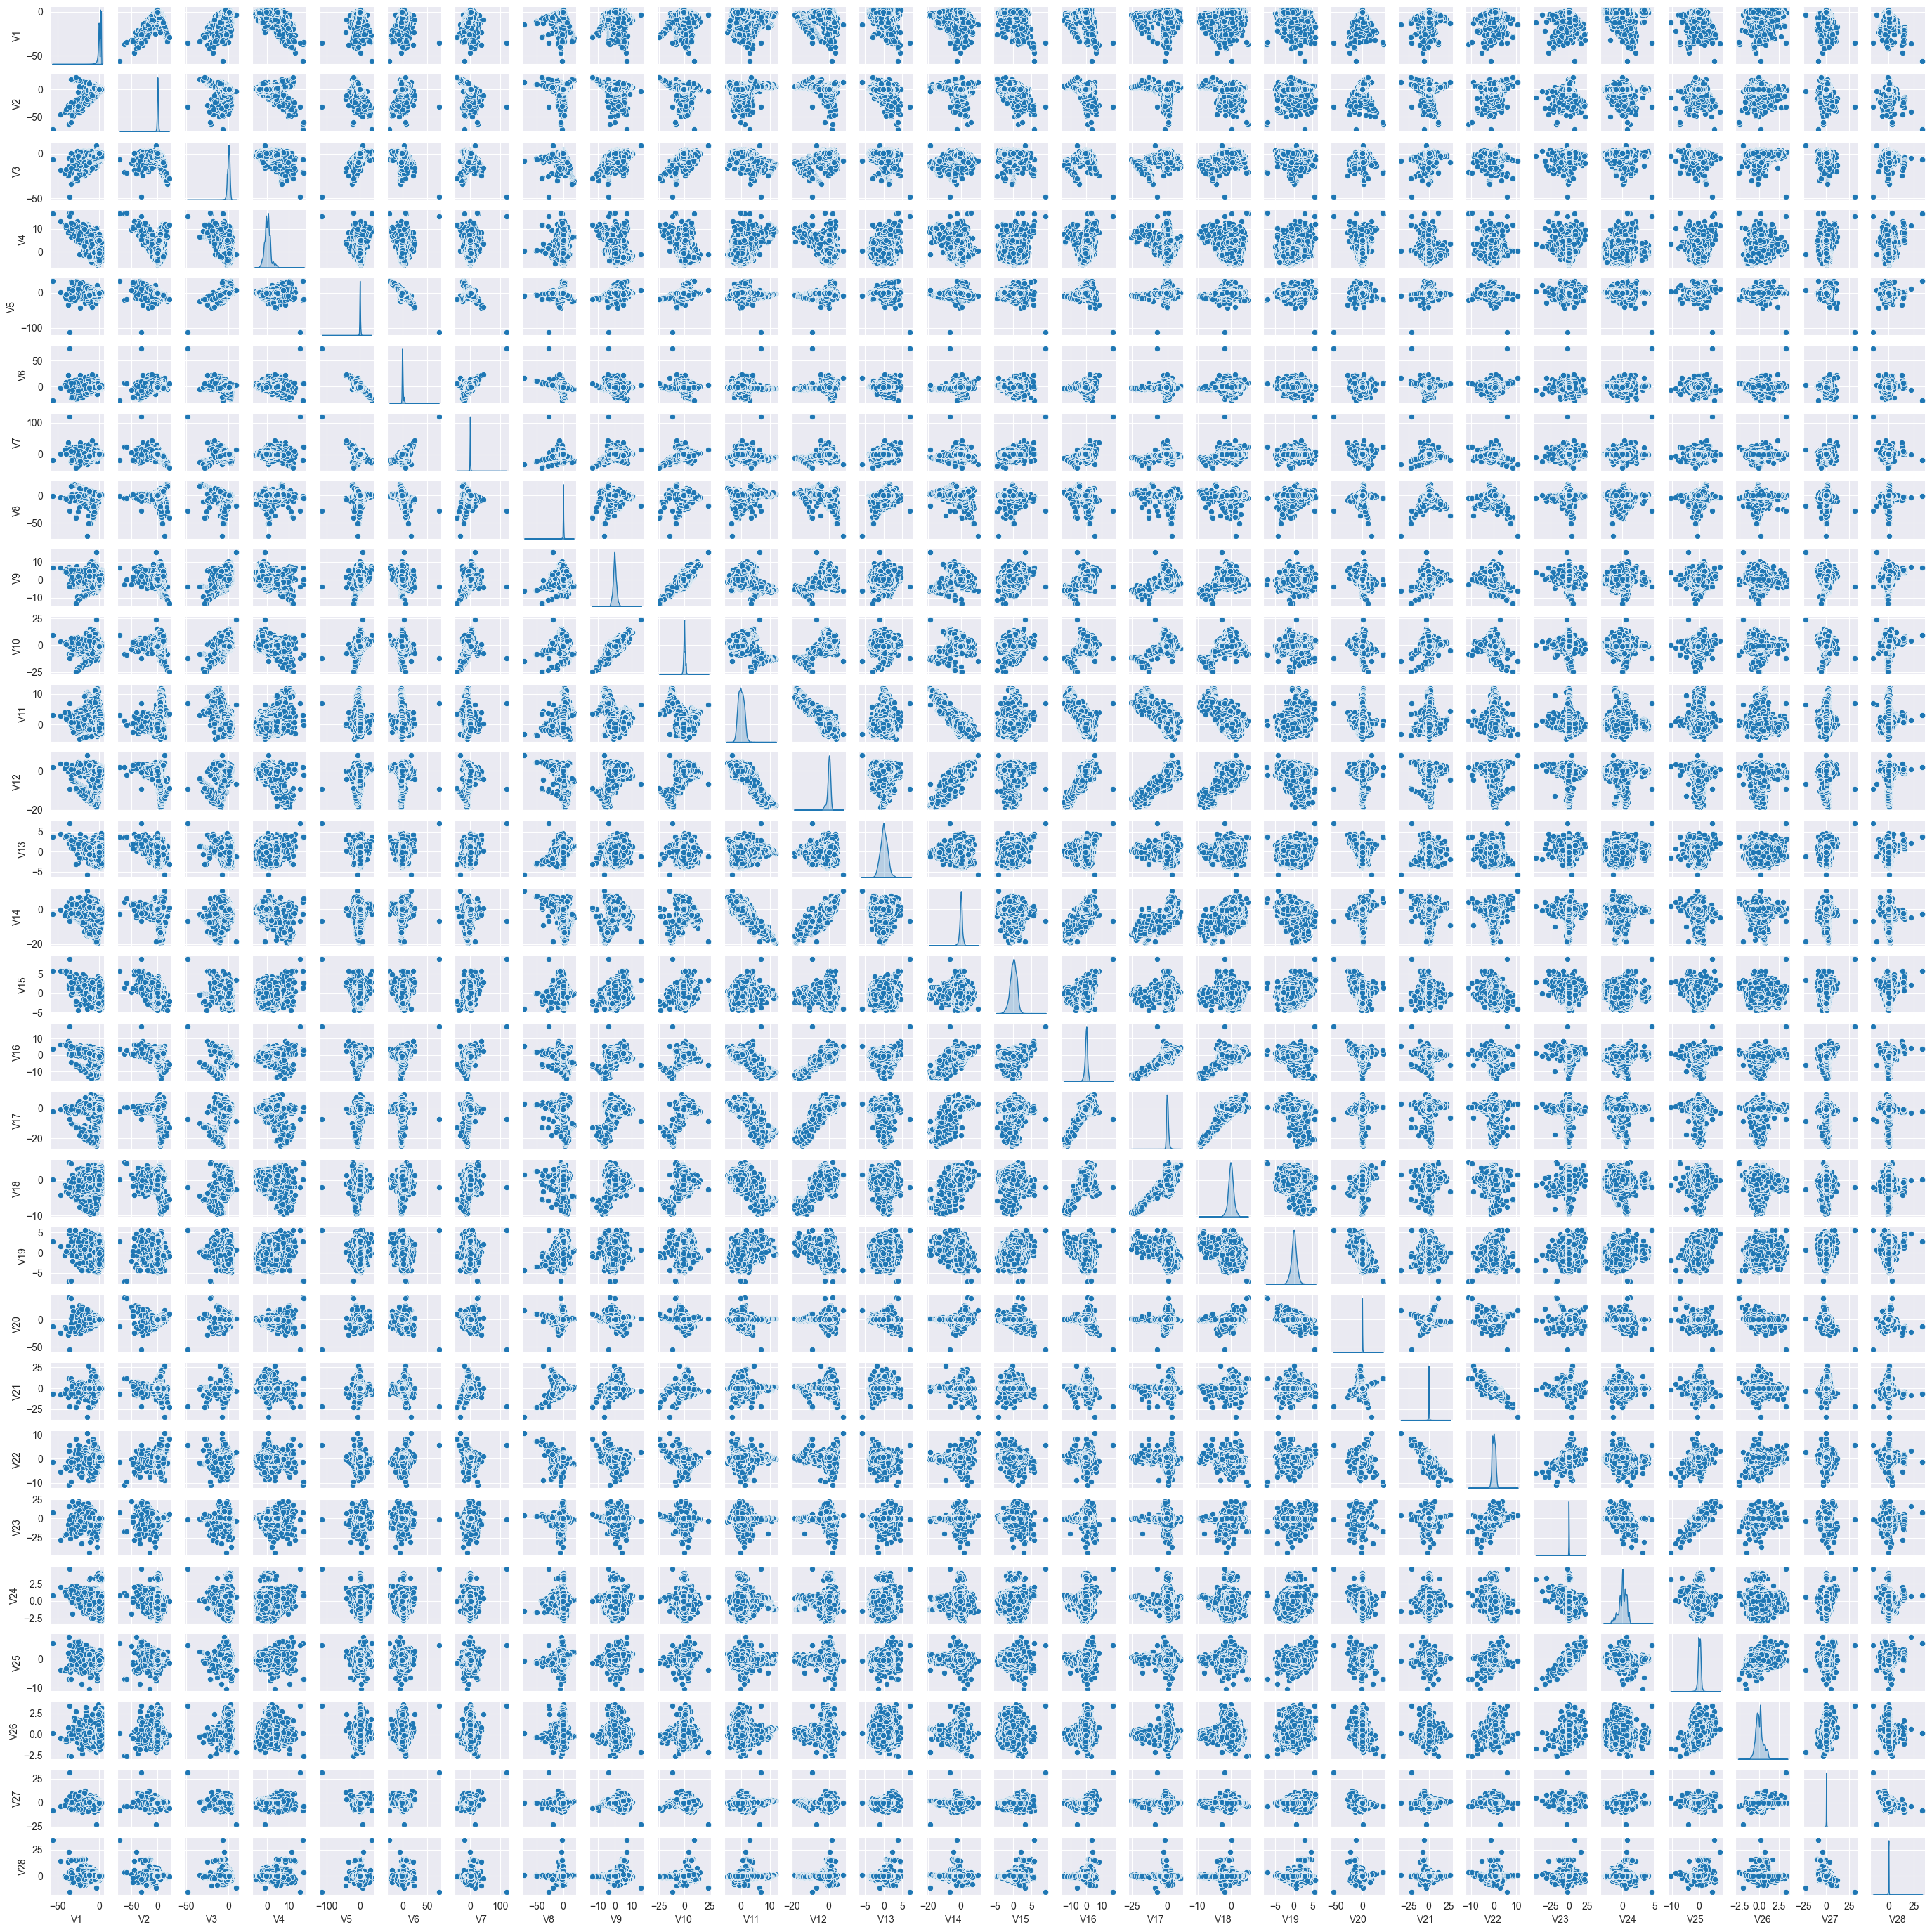

In [12]:

#manage Multicollinearity by removing pairs with high collinearity

sns.pairplot(df_features,diag_kind="kde", height=1)


In [13]:
# V9 and V10 tightly correlated

df = df.drop(['V6',"V10","V18","V25","V11"], axis=1)
del df_features
df_features = df.drop(['Class',"Rounded"], axis=1)


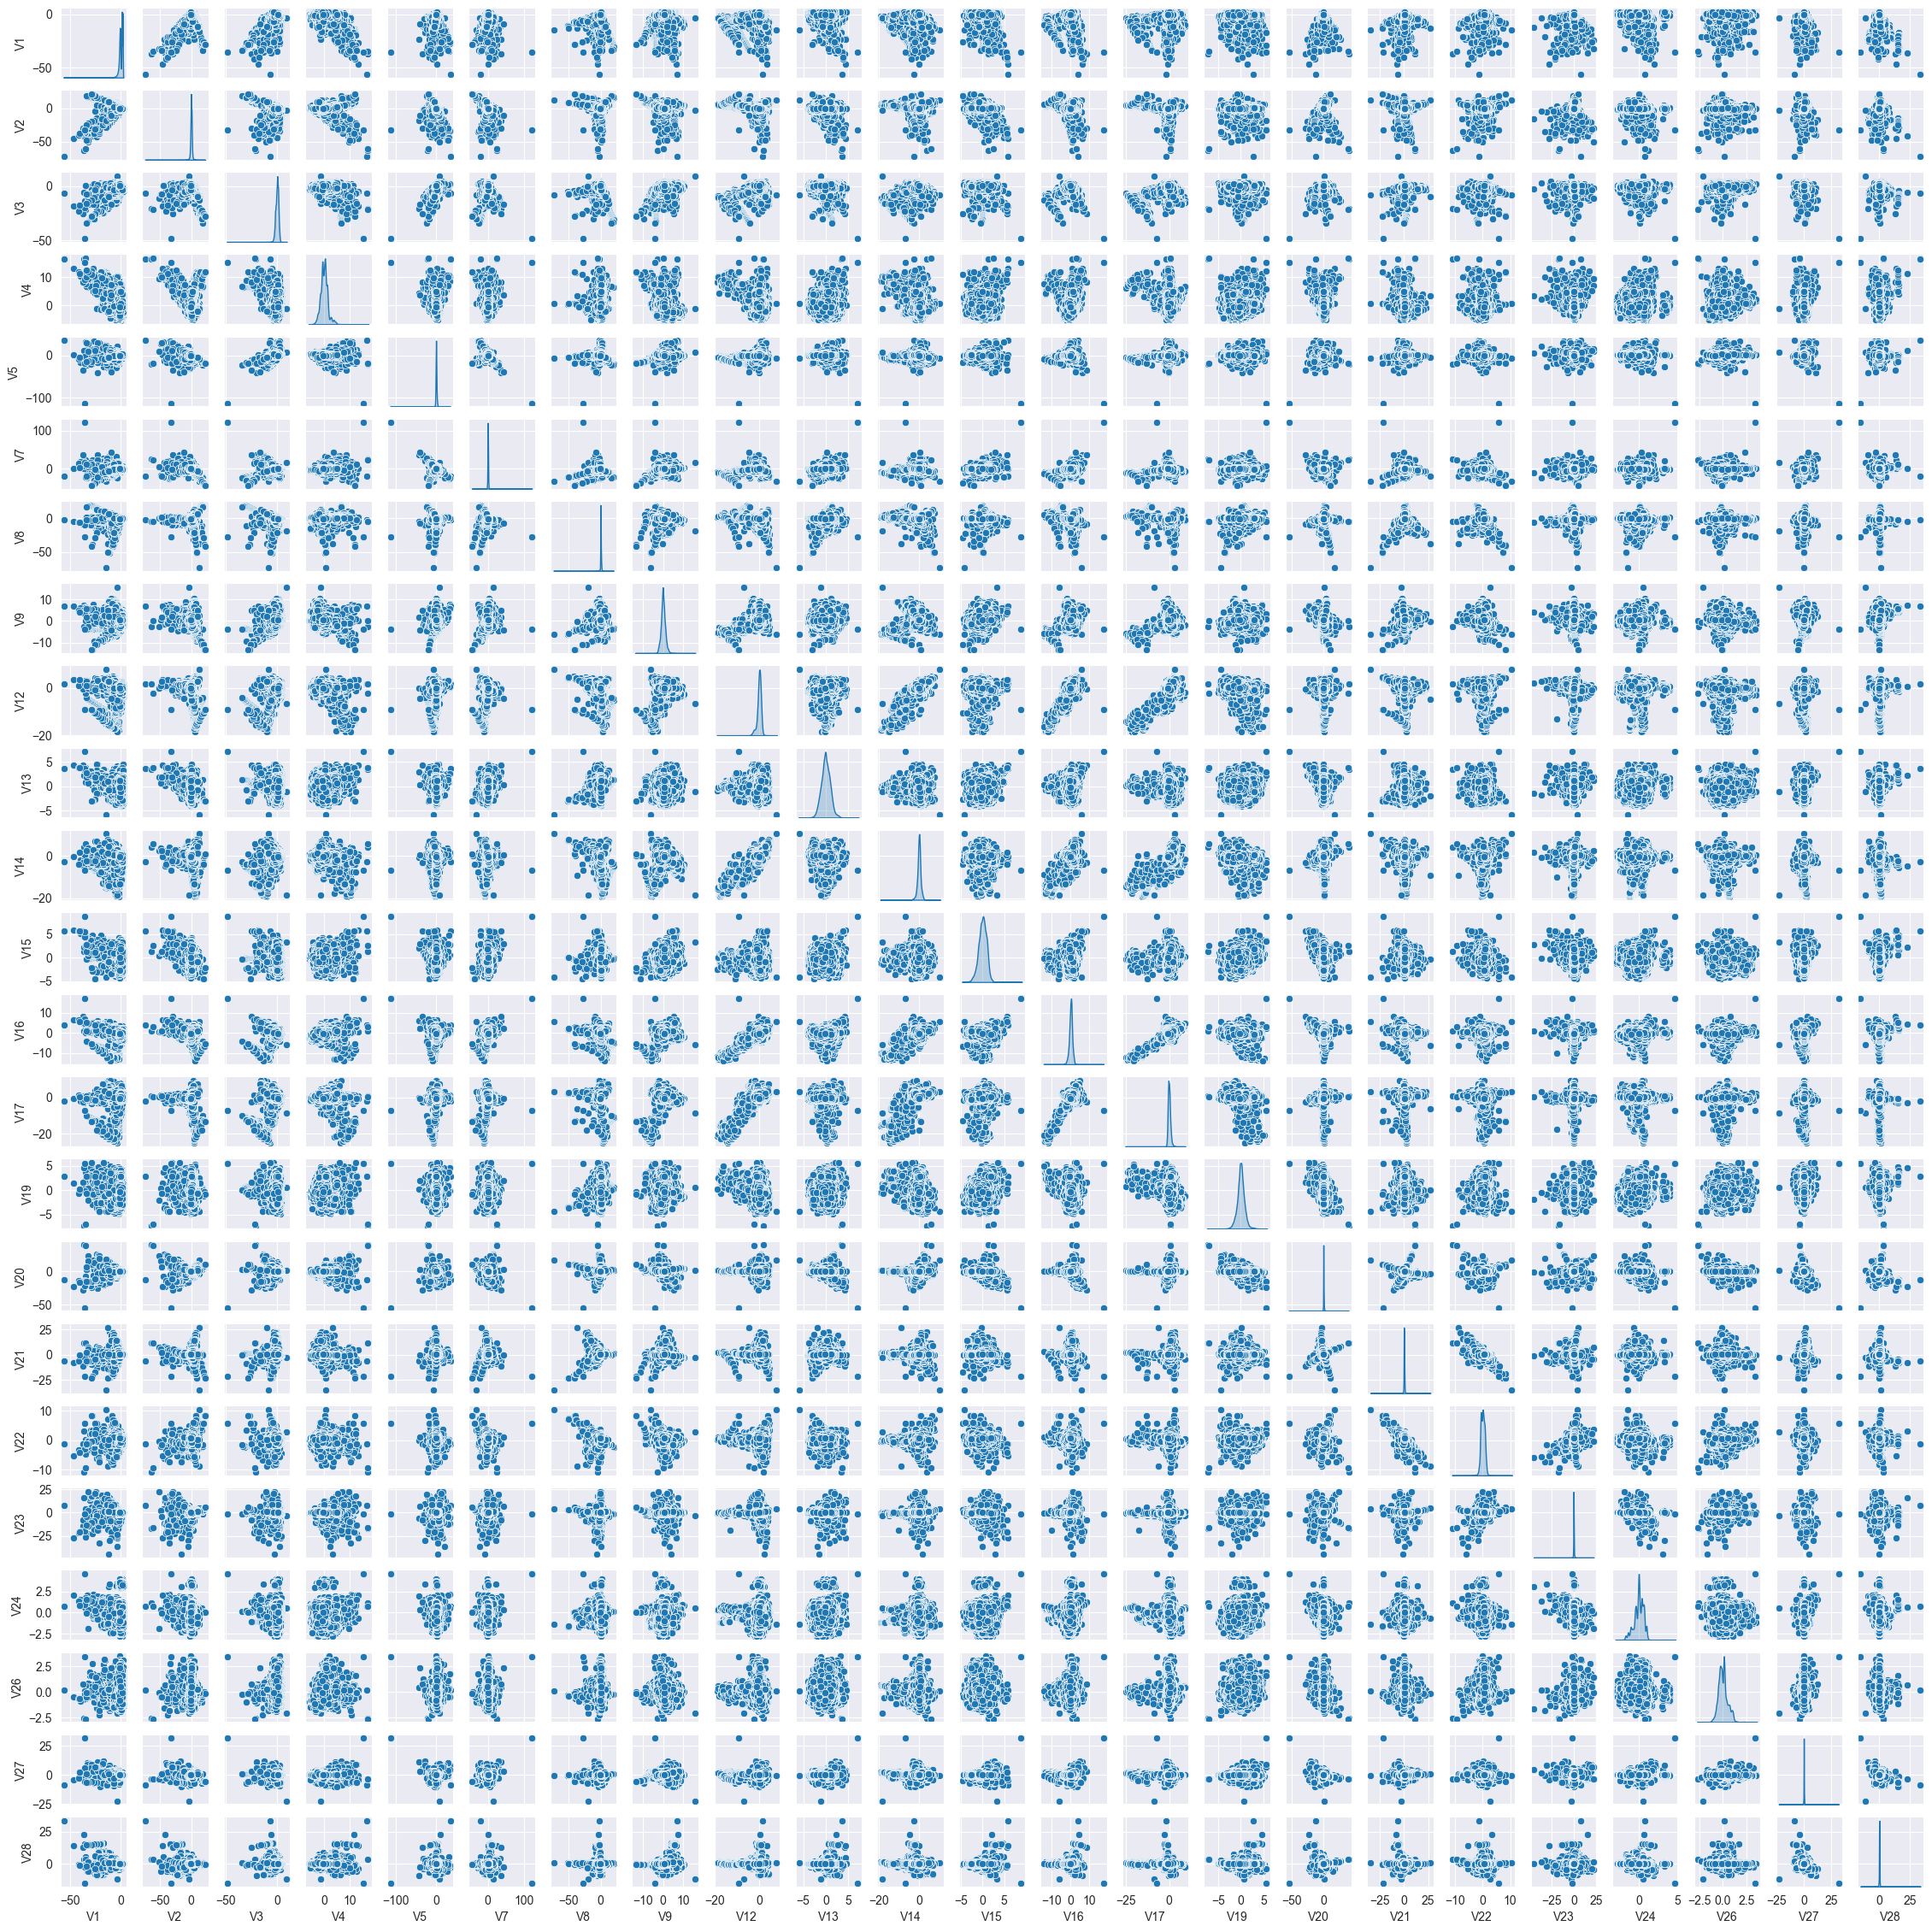

In [14]:
sns.pairplot(df_features,diag_kind="kde", height=1)

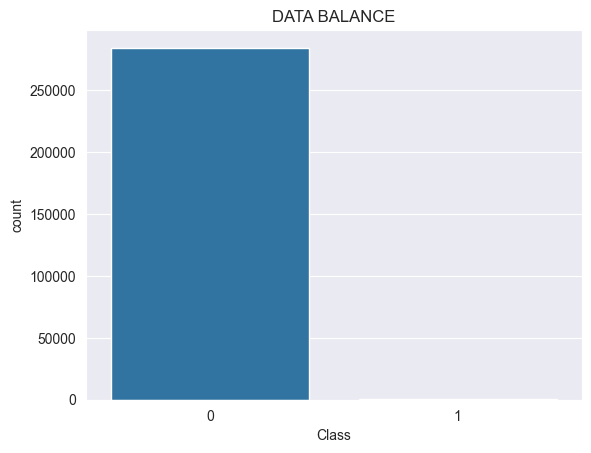

In [15]:
del df_features


df = df.drop(['V22',"V17"], axis=1)

#graphical display of imbalance
sns.countplot(x=df["Class"])
plt.title("DATA BALANCE")
plt.show()


In [16]:

# checked for bad records
# dropped useless features
# converted amount from float to rounded int
# dropped features to reduce correlation between features

#dataset is munged and ready to process

#df.info()

feature_names = [col for col in list(df) if col !="Class"]
print("feature_names",feature_names)

y = df['Class'].values
X = df.drop('Class', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

print(f'train count: {len(X_train)}\ntest count:{len(X_test)}')
df.info()
#reduced dataset size from 67 to 50 MB - about 25%

feature_names ['V1', 'V2', 'V3', 'V4', 'V5', 'V7', 'V8', 'V9', 'V12', 'V13', 'V14', 'V15', 'V16', 'V19', 'V20', 'V21', 'V23', 'V24', 'V26', 'V27', 'V28', 'Rounded']
train count: 227845
test count:56962
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 23 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   V1       284807 non-null  float64
 1   V2       284807 non-null  float64
 2   V3       284807 non-null  float64
 3   V4       284807 non-null  float64
 4   V5       284807 non-null  float64
 5   V7       284807 non-null  float64
 6   V8       284807 non-null  float64
 7   V9       284807 non-null  float64
 8   V12      284807 non-null  float64
 9   V13      284807 non-null  float64
 10  V14      284807 non-null  float64
 11  V15      284807 non-null  float64
 12  V16      284807 non-null  float64
 13  V19      284807 non-null  float64
 14  V20      284807 non-null  float64
 15  V21      284807 non

In [17]:
df.info()
del df

clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 23 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   V1       284807 non-null  float64
 1   V2       284807 non-null  float64
 2   V3       284807 non-null  float64
 3   V4       284807 non-null  float64
 4   V5       284807 non-null  float64
 5   V7       284807 non-null  float64
 6   V8       284807 non-null  float64
 7   V9       284807 non-null  float64
 8   V12      284807 non-null  float64
 9   V13      284807 non-null  float64
 10  V14      284807 non-null  float64
 11  V15      284807 non-null  float64
 12  V16      284807 non-null  float64
 13  V19      284807 non-null  float64
 14  V20      284807 non-null  float64
 15  V21      284807 non-null  float64
 16  V23      284807 non-null  float64
 17  V24      284807 non-null  float64
 18  V26      284807 non-null  float64
 19  V27      284807 non-null  float64
 20  V28      284807 non-null  

DecisionTreeClassifier()

In [18]:

y_pred = clf.predict(X_test)
recall = recall_score(y_test, y_pred)
dt_score =clf.score(X_test,y_test)

print(f"DT Recall Score: {recall:.4f}")
print(f"DT Accuracy Score: {dt_score:.4f}")



DT Recall Score: 0.7143
DT Accuracy Score: 0.9990


In [38]:
# This is a case where a very high score does not necessarily mean reliable data - the algo could have just predicted 0 every time to get similar results

# hyperparameter tuning

from sklearn.model_selection import cross_val_score

test_count = 10
rf_tests = []

total_time_start = time.time()
for i in range(1,test_count+1):
    rf_test = {}
    rf_test['count']=i
    rf_clf = RandomForestClassifier(n_estimators=i, random_state=42, class_weight='balanced')
    start_time = time.time()
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    rf_test['recall']=recall
    end_time = time.time()
    prediction_time = end_time - start_time
    rf_test['time']=prediction_time
    rf_tests.append(rf_test)
    print(f"Count: {i} Recall Score: {recall:.4f} Time {prediction_time:.4f}")

total_time_end = time.time()
total_time= total_time_end-total_time_start
total_time = total_time/60
print(f"Total Time: {total_time:.1f} minutes")

print(rf_tests)

cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Count: 1 Recall Score: 0.6633 Time 0.4248
Count: 2 Recall Score: 0.5816 Time 0.9367
Count: 3 Recall Score: 0.6837 Time 1.4370
Count: 4 Recall Score: 0.6122 Time 1.9091
Count: 5 Recall Score: 0.7041 Time 2.4285
Count: 6 Recall Score: 0.6837 Time 2.9689
Count: 7 Recall Score: 0.7143 Time 3.6940
Count: 8 Recall Score: 0.6837 Time 4.1003
Count: 9 Recall Score: 0.7041 Time 4.5781
Count: 10 Recall Score: 0.6735 Time 5.1003
Total Time: 0.5 minutes
[{'count': 1, 'recall': 0.6632653061224489, 'time': 0.42476677894592285}, {'count': 2, 'recall': 0.5816326530612245, 'time': 0.936683177947998}, {'count': 3, 'recall': 0.6836734693877551, 'time': 1.437006950378418}, {'count': 4, 'recall': 0.6122448979591837, 'time': 1.9090559482574463}, {'count': 5, 'recall': 0.7040816326530612, 'time': 2.4284777641296387}, {'count': 6, 'recall': 0.6836734693877551, 'time': 2.9689362049102783}, {'count': 7, 'recall': 0.7142857142857143, 'time': 3.6940360069274902}, {'count': 8, 'recall': 0.6836734693877551, 'time': 

In [41]:
ada_tests = []
test_count = 10
total_time_start = time.time()
for i in range(1,test_count+1):
    ada_test = {}
    ada_test['count']=i*100

    # Initialize AdaBoost with a Decision Tree as the base estimator
    ada_clf = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),  # Weak learners (stumps)
        n_estimators=i*100,  # Number of weak learners
        learning_rate=1.0,
        random_state=42
    )

    # Train the AdaBoost model
    start_time = time.time()
    ada_clf.fit(X_train, y_train)

    y_pred = ada_clf.predict(X_test)

    prediction_time = end_time - start_time
    #print(f"Prediction Time: {prediction_time:.4f} seconds")
    recall = recall_score(y_test, y_pred)
    end_time = time.time()
    prediction_time = end_time - start_time
    ada_test['recall']=recall
    ada_test['time']=prediction_time
    ada_tests.append(ada_test)
    print(f"Count: {i} Recall Score: {recall:.4f} Time {prediction_time:.4f}")

#print(classification_report(y_test, y_pred))
print(ada_tests)
total_time_end = time.time()
total_time= total_time_end-total_time_start
total_time = total_time/60
print(f"Total Time: {total_time:.1f} minutes")


Count: 1 Recall Score: 0.5918 Time 52.4609
Count: 2 Recall Score: 0.6327 Time 104.4089
Count: 3 Recall Score: 0.6531 Time 156.4944
Count: 4 Recall Score: 0.6633 Time 208.7979
Count: 5 Recall Score: 0.6633 Time 261.6357
Count: 6 Recall Score: 0.6735 Time 314.5730
Count: 7 Recall Score: 0.6735 Time 368.3951
Count: 8 Recall Score: 0.6837 Time 421.4517
Count: 9 Recall Score: 0.6837 Time 474.3696
Count: 10 Recall Score: 0.6939 Time 527.4221
[{'count': 100, 'recall': 0.5918367346938775, 'time': 52.46094107627869}, {'count': 200, 'recall': 0.6326530612244898, 'time': 104.40885782241821}, {'count': 300, 'recall': 0.6530612244897959, 'time': 156.49435210227966}, {'count': 400, 'recall': 0.6632653061224489, 'time': 208.79792094230652}, {'count': 500, 'recall': 0.6632653061224489, 'time': 261.6356930732727}, {'count': 600, 'recall': 0.673469387755102, 'time': 314.57295322418213}, {'count': 700, 'recall': 0.673469387755102, 'time': 368.3951082229614}, {'count': 800, 'recall': 0.6836734693877551, '

In [42]:
recall = recall_score(y_test, y_pred)
print(f"Recall Score: {recall:.4f}")

Recall Score: 0.6939


In [23]:

clf = tree.DecisionTreeClassifier(class_weight='balanced')
#tree.plot_tree(clf.fit(X_train,y_train))
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [56]:
recall = recall_score(y_test, y_pred)

dt_score =clf.score(X_test,y_test)

print(f"Recall Score: {recall:.4f}")
print(f"Accuracy Score: {dt_score:.4f}")

#Non-parametric ML models

Recall Score: 0.6939
Accuracy Score: 0.9991


In [59]:
feature_importances_dt = pd.DataFrame({'Feature': feature_names, 'Importance': clf.feature_importances_})
feature_importances_dt = feature_importances_dt.sort_values(by='Importance', ascending=False)
\
feature_importances_rf = pd.DataFrame({'Feature': feature_names, 'Importance': rf_clf.feature_importances_})
feature_importances_rf = feature_importances_rf.sort_values(by='Importance', ascending=False)


feature_importances_ada = pd.DataFrame({'Feature': feature_names, 'Importance': ada_clf.feature_importances_})
feature_importances_ada = feature_importances_ada.sort_values(by='Importance', ascending=False)

print("\nTop Five Feature Importance DT")
print(feature_importances_dt.head(5))
print("\nTop Five Feature Importance RF")
print(feature_importances_rf.head(5))
print("\nTop Five Feature Importance ADA Boost")
print(feature_importances_ada.head(5))

print("\nTop Ten Feature Importance DT")
print(feature_importances_dt.head(10))
print("\nTop Ten Feature Importance RF")
print(feature_importances_rf.head(10))
print("\nTop Ten Feature Importance ADA Boost")
print(feature_importances_ada.head(10))


Top Five Feature Importance DT
   Feature  Importance
10     V14    0.745290
3       V4    0.056128
8      V12    0.044365
11     V15    0.021494
6       V8    0.019828

Top Five Feature Importance RF
   Feature  Importance
10     V14    0.207247
2       V3    0.139240
8      V12    0.130323
5       V7    0.107762
3       V4    0.096427

Top Five Feature Importance ADA Boost
   Feature  Importance
8      V12    0.208497
3       V4    0.103492
2       V3    0.058893
10     V14    0.057476
5       V7    0.050953

Top Ten Feature Importance DT
   Feature  Importance
10     V14    0.745290
3       V4    0.056128
8      V12    0.044365
11     V15    0.021494
6       V8    0.019828
18     V26    0.015897
2       V3    0.015215
5       V7    0.012403
12     V16    0.012249
16     V23    0.011478

Top Ten Feature Importance RF
   Feature  Importance
10     V14    0.207247
2       V3    0.139240
8      V12    0.130323
5       V7    0.107762
3       V4    0.096427
12     V16    0.055319
7      

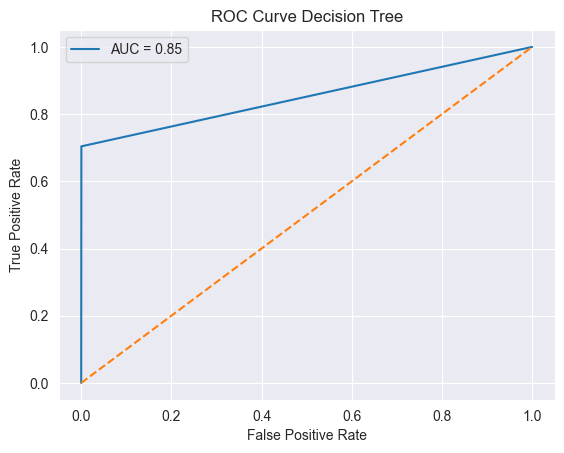

In [26]:
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability for class 1
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Decision Tree")
plt.legend()
plt.show()

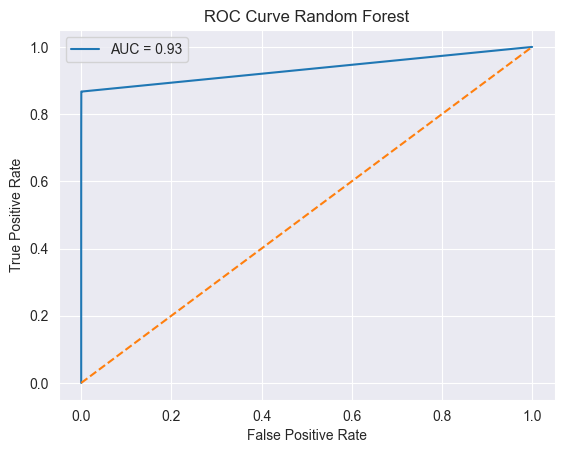

In [27]:
y_prob = rf_clf.predict_proba(X_test)[:, 1]  # Probability for class 1
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Random Forest")
plt.legend()
plt.show()

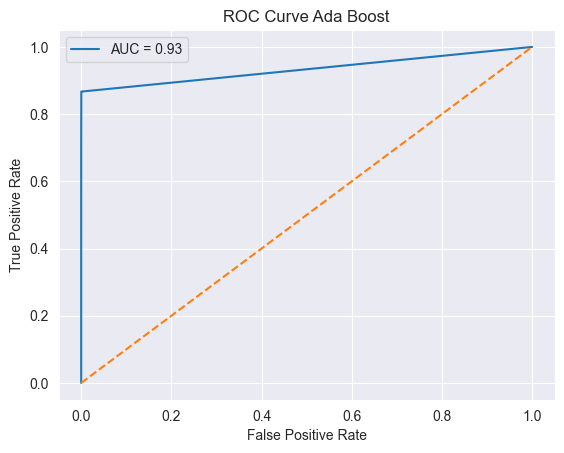

In [28]:

y_prob = rf_clf.predict_proba(X_test)[:, 1]  # Probability for class 1
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Ada Boost")
plt.legend()
plt.show()

In [29]:
print(len(ada_tests))
print(len(rf_tests))

10
10


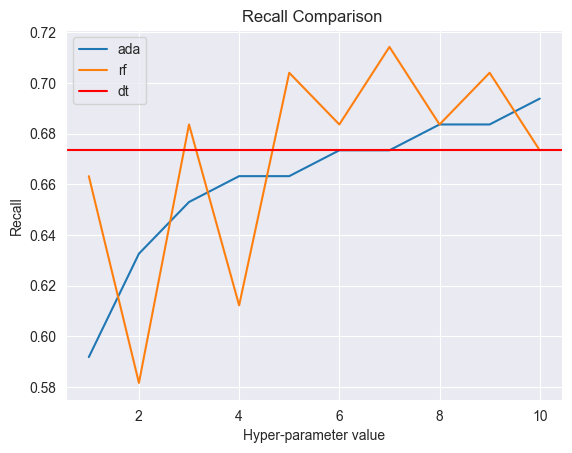

In [46]:
yaxis = []
ada_recall =[]
ada_time =[]
rf_recall =[]
rf_time =[]

i = 1
for test in ada_tests:
    yaxis.append(i)
    ada_recall.append(test['recall'])
    ada_time.append(test['time'])
    i=i+1

for test in rf_tests:
    rf_recall.append(test['recall'])
    rf_time.append(test['time'])

plt.plot(yaxis, ada_recall, label="ada")
plt.plot(yaxis, rf_recall, label="rf")

plt.axhline(y=.6735, color='r', linestyle='-', label="dt")
plt.xlabel("Hyper-parameter value")
plt.ylabel("Recall")
plt.title("Recall Comparison ")
plt.legend()
plt.show()


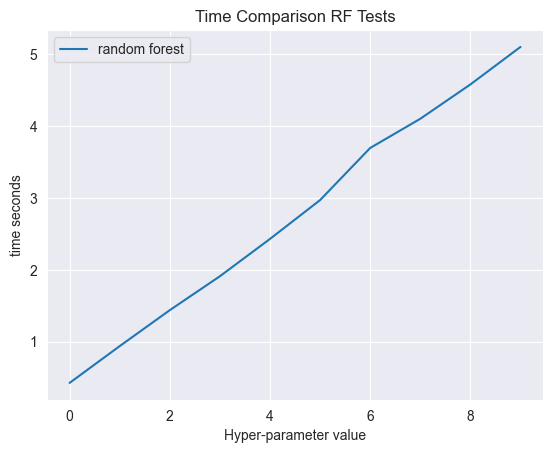

In [52]:

plt.plot( rf_time, label="random forest")

plt.xlabel("Hyper-parameter value")
plt.ylabel("time seconds")
plt.title("Time Comparison RF Tests")
plt.legend()
plt.show()

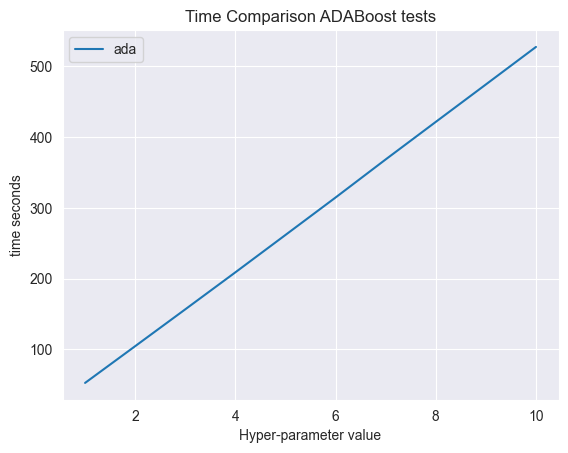

In [53]:
plt.plot(yaxis, ada_time, label="ada")

plt.xlabel("Hyper-parameter value")
plt.ylabel("time seconds")
plt.title("Time Comparison ADABoost tests")
plt.legend()
plt.show()